In [137]:
import os
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi
import tempfile

# Set Kaggle credentials as environment variables
os.environ['KAGGLE_USERNAME'] = 'tomerweissman661'
os.environ['KAGGLE_KEY'] = 'd3a379e67e038cd237bc5099338e6770'

# Initialize Kaggle API
api = KaggleApi()
api.authenticate()

# Function to load a file from the Kaggle competition directly into a pandas DataFrame
def load_kaggle_competition_file(competition, file_name):
    with tempfile.TemporaryDirectory() as tmpdirname:
        file_path = os.path.join(tmpdirname, file_name)
        api.competition_download_file(competition, file_name, path=tmpdirname)
        return pd.read_csv(file_path)

# Check available files in the competition
files = api.competition_list_files('house-prices-advanced-regression-techniques').files
for f in files:
    print(f.name, f.size)

# Load train and test datasets
train_data = load_kaggle_competition_file('house-prices-advanced-regression-techniques', 'train.csv')
test_data = load_kaggle_competition_file('house-prices-advanced-regression-techniques', 'test.csv')


sample_submission.csv 31KB
test.csv 441KB
data_description.txt 13KB
train.csv 450KB


100%|████████████████████████████████████████| 450k/450k [00:00<00:00, 1.15MB/s]


100%|████████████████████████████████████████| 441k/441k [00:00<00:00, 1.27MB/s]

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 40803770368.0000 - mean_squared_error: 40803770368.0000 - val_loss: 39681032192.0000 - val_mean_squared_error: 39681032192.0000
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 37900464128.0000 - mean_squared_error: 37900464128.0000 - val_loss: 38865981440.0000 - val_mean_squared_error: 38865981440.0000
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 37911855104.0000 - mean_squared_error: 37911855104.0000 - val_loss: 37315952640.0000 - val_mean_squared_error: 37315952640.0000
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 37318979584.0000 - mean_squared_error: 37318979584.0000 - val_loss: 34682216448.0000 - val_mean_squared_error: 34682216448.0000
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 32402139136.0000 - mean_squared_error: 32402139136.0000 - val_loss: 30031738880.0000 - val_mean_squared_error: 30031738880.0000
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - lo

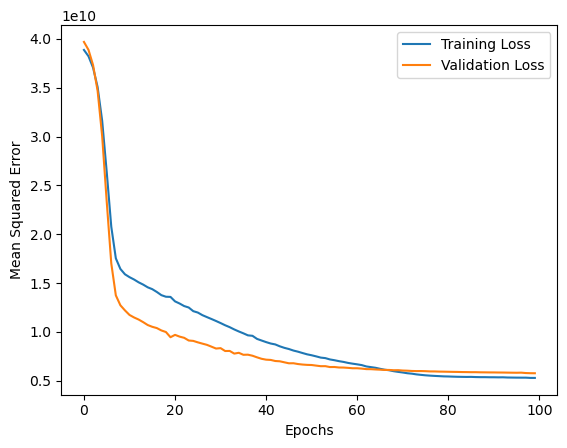

In [203]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import MinMaxScaler


# Assuming train_data is already defined and contains 'LotFrontage', 'LotArea', and 'SalePrice' columns

# Handle missing values by filling with the mean value
front = train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
area = train_data['LotArea'].fillna(train_data['LotArea'].mean())
year = train_data['YrSold'].fillna(train_data['YrSold'].mean())
mo = train_data['MoSold'].fillna(train_data['MoSold'].mean())

price = train_data['SalePrice'].fillna(train_data['SalePrice'].mean())

# Check for infinite values and replace them with the mean
front = np.where(np.isfinite(front), front, np.mean(front))
area = np.where(np.isfinite(area), area, np.mean(area))
mo = np.where(np.isfinite(mo), mo, np.mean(mo))
year = np.where(np.isfinite(year), year, np.mean(year))

price = np.where(np.isfinite(price), price, np.mean(price))

# Prepare input data X and output data Y
X = np.array([front, area, year, mo]).T
Y = np.array(price).reshape(-1, 1)

# Normalize the input features
# Scale the input features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

M = X.shape[0]
test_size = int(round(M*0.15, 0))
X_test = X[:test_size]
Y_test = Y[:test_size]
X_train = X[test_size:]
Y_train = Y[test_size:]

# Define the model with L2 regularization
model = Sequential(
    [
        tf.keras.Input(shape=(X.shape[1],)),
        Dense(10, activation='relu', kernel_regularizer=l2(0.00001)),
        Dense(10, activation='relu', kernel_regularizer=l2(0.00001)),
        Dense(10, activation='relu', kernel_regularizer=l2(0.00001)),
        Dense(10, activation='relu', kernel_regularizer=l2(0.00001)),
        Dense(1, activation='linear', kernel_regularizer=l2(0.00001))
    ])

# Compile the model
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mean_squared_error']
)

# Train the model
history = model.fit(
    X, Y,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


In [204]:

import numpy as np

def accuracy(X, Y, model):
    m = Y.shape[0]  # Number of samples
    total_squared_error = 0
    
    for i in range(m):
        y_true = Y[i]
        y_pred = model.predict(X[i].reshape(1, -1))

        # Calculate the squared error
        total_squared_error += (y_true - y_pred)**2
    
    # Calculate RMSE
    rmse = (total_squared_error / m)**0.5
    return rmse

In [205]:
result = accuracy(X_test, Y_test, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [206]:
print(result[0])

[67767.64029016]


In [182]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
